In [1]:
import pandas as pd
import itertools
import numpy as np
import gc
import matplotlib.pyplot as plt


In [2]:
csv= '/home/mei/nas/docker/thesis/data/csv/'
hdf= '/home/mei/nas/docker/thesis/data/hdf/'

In [4]:
final_ts= pd.read_hdf(hdf+ "final_timeseries.h5", key="df") # key is the name of the key in the hdf file
final_ts

-bands  -basos  -eos  -lymphs  -monos  -polys  \
patient time                                                  
252784  1        0.0     0.0   0.0      0.0     0.0     0.0   
        2        0.0     0.0   0.0      0.0     0.0     0.0   
        3        0.0     0.0   0.0      0.0     0.0     0.0   
        4        0.0     0.0   0.0      0.0     0.0     0.0   
        5        0.0     0.0   0.0      0.0     0.0     0.0   
...              ...     ...   ...      ...     ...     ...   
3348105 1500     0.0     1.0   2.0     12.0    13.0     0.0   
        1501     0.0     1.0   2.0     12.0    13.0     0.0   
        1502     0.0     1.0   2.0     12.0    13.0     0.0   
        1503     0.0     1.0   2.0     12.0    13.0     0.0   
        1504     0.0     1.0   2.0     12.0    13.0     0.0   

              24 h urine protein  24 h urine urea nitrogen  ALT (SGPT)  \
patient time                                                             
252784  1                    0.0                       0.0         0.0   
        2                    0.0                       0.0         0.0   
        3                    0.0                       0.0         0.0   
        4                    0.0                       0.0         0.0   
        5                    0.0                       0.0         0.0   
...                          ...                       ...         ...   
3348105 1500                 0.0                       0.0        17.0   
        1501                 0.0                       0.0        17.0   
        1502                 0.0                       0.0        17.0   
        1503                 0.0                       0.0        17.0   
        1504                 0.0                       0.0        17.0   

              ANF/ANA  ...   sao2  heartrate  respiration  cvp  \
patient time           ...                                       
252784  1         0.0  ...  100.0      106.0         22.0  0.0   
        2         0.0  ...  100.0      107.0         24.0  0.0   
        3         0.0  ...  100.0      109.0         21.0  0.0   
        4         0.0  ...  100.0      110.0         26.0  0.0   
        5         0.0  ...   98.0      116.0         26.0  0.0   
...               ...  ...    ...        ...          ...  ...   
3348105 1500      0.0  ...   98.0      113.0          9.0  0.0   
        1501      0.0  ...   98.0      113.0          9.0  0.0   
        1502      0.0  ...   98.0      113.0          9.0  0.0   
        1503      0.0  ...   98.0      113.0          9.0  0.0   
        1504      0.0  ...   98.0      113.0          9.0  0.0   

              systemicsystolic  systemicdiastolic  systemicmean   st1   st2  \
patient time                                                                  
252784  1                  0.0                0.0           0.0  0.05  0.05   
        2                  0.0                0.0           0.0  0.10  0.00   
        3                  0.0                0.0           0.0  0.00  0.10   
        4                  0.0                0.0           0.0  0.10  0.00   
        5                  0.0                0.0           0.0  0.00  0.00   
...                        ...                ...           ...   ...   ...   
3348105 1500               0.0                0.0           0.0  0.00  0.00   
        1501               0.0                0.0           0.0  0.00  0.00   
        1502               0.0                0.0           0.0  0.00  0.00   
        1503               0.0                0.0           0.0  0.00  0.00   
        1504               0.0                0.0           0.0  0.00  0.00   

              st3  
patient time       
252784  1     0.0  
        2    -0.1  
        3     0.0  
        4    -0.1  
        5     0.0  
...           ...  
3348105 1500  0.0  
        1501  0.0  
        1502  0.0  
        1503  0.0  
        1504  0.0  

[18094141 rows x 162 columns]

In [4]:
final_labels=pd.read_hdf(hdf + 'final_labels.h5').set_index('patient')
final_labels

,dischargeweight,unitdischargestatus,actualiculos,discharge_risk_category
patient,,,,
252784,75.7,0,2.0500,1
253331,114.4,0,1.7625,1
255112,58.2,1,10.7381,4
258354,75.3,0,3.0090,1
259414,106.7,0,5.8562,1
...,...,...,...,...
3247116,68.0,1,8.1256,4
3247421,82.1,0,2.9520,1
3346588,115.3,0,2.1826,2


In [7]:
risk_category_counts = final_labels['discharge_risk_category'].value_counts().sort_index()
risk_category_counts

discharge_risk_category
0    1157
1    8753
2    1099
3      72
4     617
Name: count, dtype: int64

In [6]:
ts= final_ts.reset_index()
td = ts[['patient','time']]
label= final_labels.reset_index()
label= label[['patient','discharge_risk_category']]
merged= pd.merge(td, label, on='patient', how='inner')
merged

,patient,time,discharge_risk_category
0,252784,1,1
1,252784,2,1
2,252784,3,1
3,252784,4,1
4,252784,5,1
...,...,...,...
18094136,3348105,1500,2
18094137,3348105,1501,2
18094138,3348105,1502,2
18094139,3348105,1503,2


In [5]:
# merged.to_hdf(hdf + 'final_risk_scores.h5', key='df',complevel=5, complib="zlib")
merged = pd.read_hdf(hdf + 'final_risk_scores.h5', key='df')

In [10]:
risk_counts = merged['discharge_risk_category'].value_counts().sort_index()
risk_counts

discharge_risk_category
0      932236
1    14820668
2     1502789
3       83481
4      754967
Name: count, dtype: int64

In [11]:
def risk_function(t, category):
    if category == 0:
        return  0.4 * (1 - np.exp(-0.0003 * t)) + 0
    elif category == 1:
        return  (0.2-0.45) * (np.exp(-0.00045 * t)) + 0.45
    elif category == 2:
        return  (0.3-0.5) * ( np.exp(-0.0005 * t)) + 0.5
    elif category == 3:
        return  (0.4-0.55) * ( np.exp(-0.00055 * t)) + 0.55
    elif category == 4:
        return  ((1.0-0.6)) * ( np.exp(-0.0006 * t)) + 0.6

In [27]:
def risk_function_same(t, category):
    V = 0.5
    if category == 0:
        return  0.4 * (1 - np.exp(-0.0003 * t)) + V-0.4
    elif category == 1:
        return  (0.2-0.45) * (np.exp(-0.00045 * t)) + V
    elif category == 2:
        return  (0.3-0.5) * ( np.exp(-0.0005 * t)) + V
    elif category == 3:
        return  (0.4-0.55) * ( np.exp(-0.00055 * t)) + V
    elif category == 4:
        return  ((1.0-0.6)) * ( np.exp(-0.0006 * t)) + V

In [17]:
max_time_per_patient = merged.groupby('patient')['time'].transform('max')
merged['risk_score'] = merged.apply(lambda row: risk_function(max_time_per_patient[row.name] - row['time'], row['discharge_risk_category']), axis=1)
merged

,patient,time,discharge_risk_category,risk_score
0,252784,1,1,0.258208
1,252784,2,1,0.258122
2,252784,3,1,0.258035
3,252784,4,1,0.257949
4,252784,5,1,0.257863
...,...,...,...,...
18094136,3348105,1500,2,0.300400
18094137,3348105,1501,2,0.300300
18094138,3348105,1502,2,0.300200
18094139,3348105,1503,2,0.300100


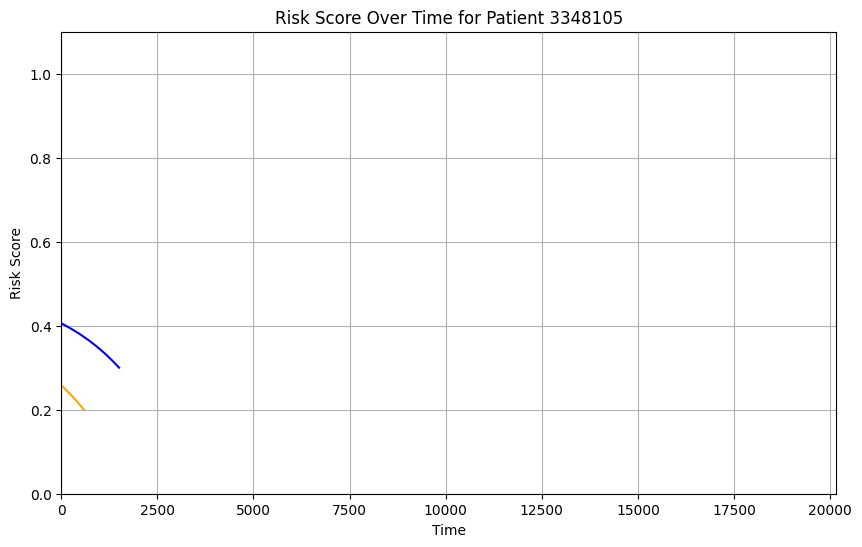

In [11]:
patient_id = 3348105

patient_data = merged[merged['patient'] == patient_id]
patient_2 = merged[merged['patient'] == 252784]

plt.figure(figsize=(10, 6))
plt.plot(patient_data['time'], patient_data['risk_score'],label="Low risk", color="blue")
plt.plot(patient_2['time'], patient_2['risk_score'], label="medium risk" ,color="orange")
plt.title(f'Risk Score Over Time for Patient {patient_id}')
plt.xlabel('Time')
plt.xlim(0,14* 24 * 60)  # 设置 x 轴范围（从大到小）
plt.ylim(0, 1.1)
plt.ylabel('Risk Score')
plt.grid(True)
plt.show()

